# Finishing our Zoo of Motivating Examples


## Eighth Motivating Example - Colorado Child Care

<img src='Images/child-care.jpeg' width=400>

In [29]:
# Consider the following data set of licenses for child care business in Colorado 
#   (from https://data.colorado.gov/)

cocc = pa.read_csv('Data Sets/Colorado_Licensed_Child_Care_Facilities_Report.csv')

cocc.head()

,PROVIDER ID,PROVIDER NAME,PROVIDER SERVICE TYPE,STREET ADDRESS,CITY,STATE,ZIP,COUNTY,COMMUNITY,ECC,...,CCCAP CASE COUNT_D1,CCCAP FA EXP DATE_D1,CCCAP TOTAL AUTH_D1,CCCAP FA STATUS_D1,CCCAP AMOUNT PAID_D1,CCCAP FA EXP DATE_D2,CCCAP TOTAL AUTH_D2,CCCAP FA STATUS_D2,LICENSE FEE DISCOUNT,LONG-LAT
0,48,VIKKI MCKEOGH,Experienced Family Child Care Home,6635 E Monaco DR,Brighton,CO,80602,Adams,West Adams,Early Childhood Partnership of Adams County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"(39.919258, -104.911005)"
1,65,JACKIE GRAY,Family Child Care Home,4388 118 Ave.,Thornton,CO,80233,Adams,West Adams,Early Childhood Partnership of Adams County,...,3.0,06/30/2019,3.0,1.0,239.20,06/14/2019,3.0,1.0,0.0,"(39.9101, -104.9344)"
2,100,CHEROKEE TRAIL ELEMENTARY KIDS CENTER,School-Age Child Care Center,17302 Clarke Farms DR,Parker,CO,80134,Douglas,Parker,Douglas County Early Childhood Council,...,3.0,06/30/2019,5.0,1.0,974.61,05/31/2020,5.0,1.0,0.0,"(39.525183, -104.786646)"
3,115,EARLY CHILDHOOD EDUCATION,Preschool Program,1023 N 31st ST,Colorado Springs,CO,80904,El Paso,Colorado Springs,Alliance for Kids,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"(38.86547, -104.867475)"
4,157,CHERLLYNN SAUNDERS,Infant/Toddler Home,5989 W Fair DR,Littleton,CO,80123,Jefferson,Northeast Jefferson,Triad Early Childhood Council,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"(39.604151, -105.063248)"


In [30]:
cocc = pa.read_csv('Data Sets/Colorado_Licensed_Child_Care_Facilities_Report.csv')
cocc = cocc.loc[:, ['COUNTY', 'CITY', 'PROVIDER SERVICE TYPE']]  # Keep only the columns we want here
cocc.loc[:, 'COUNT'] = 1   # Add a variable for counting unique values
cocc = cocc.groupby(['COUNTY', 'CITY', 'PROVIDER SERVICE TYPE']).sum()   
 # Sum the values after grouping by County, 
       # City, and Provider Type
    
cocc.head()

COUNT
COUNTY CITY   PROVIDER SERVICE TYPE                    
Adams  Arvada Child Care Center                       2
       Aurora Child Care Center                      10
              Experienced Family Child Care Home      1
              Family Child Care Home                  2
              Preschool Program                       7

Worth pausing here and making sure we understand what we have done: We have created a new data frame whose rows are now the County, City, and Provider Type factors; and the single Column is the Count of the number of 
that Provider Type in the City.

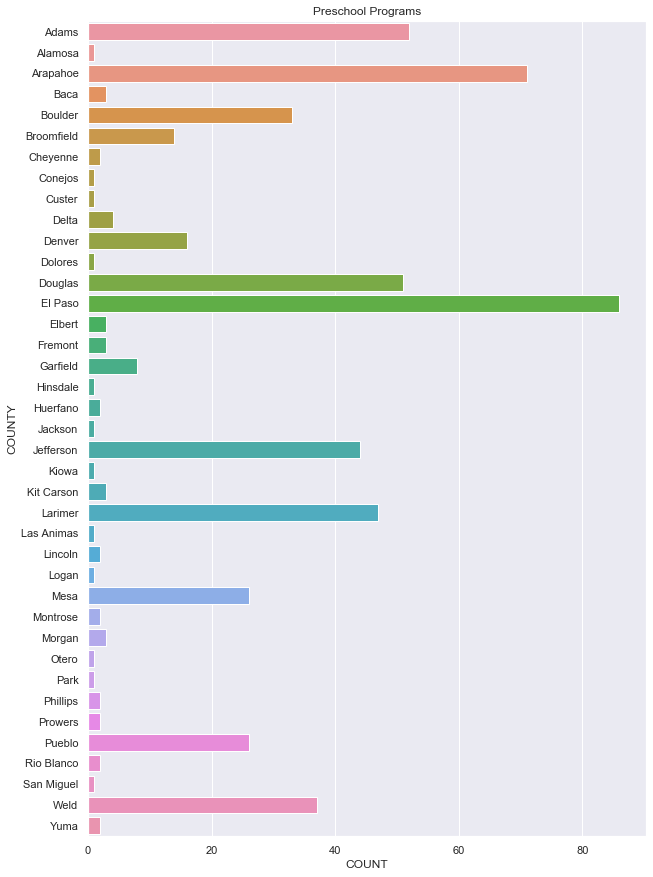

In [31]:
temp = cocc.reset_index().loc[:, ['COUNTY', 'PROVIDER SERVICE TYPE', 'COUNT']]  

# Drop the city and go back to a full data frame.

temp = temp.groupby(['COUNTY', 'PROVIDER SERVICE TYPE']).sum()

# Redo the gather but now ignoring City

temp = temp.reset_index()

# Set it back to a full data frame.

temp = temp[temp['PROVIDER SERVICE TYPE']=='Preschool Program']

plt.figure(figsize = (10, 15))
sn.set(style='darkgrid')
sn.barplot(x='COUNT', y='COUNTY', data=temp)
plt.title('Preschool Programs');

Fine for someone from Colorado. But can we do better?

In [32]:
cocc = pa.read_csv('Data Sets/Colorado_Licensed_Child_Care_Facilities_Report.csv')
temp = cocc.loc[:, ['PROVIDER SERVICE TYPE', 'LONG-LAT'] ]

# pull up the longitude and lattitude coordinates
 
lon = [eval(temp.loc[c, 'LONG-LAT'])[0] for c in temp.index.values]
lat = [eval(temp.loc[c, 'LONG-LAT'])[1] for c in temp.index.values]
    
# Separate the longitude and lattide coordinates
# Some notes on the Python here:  the coordinates have been read in as a string, we can convert them to a 
# tuple with eval and then reference each with a position index.

locate = pa.DataFrame(np.array( [lon, lat]).transpose(), columns = ['Long', 'Lat'])
locate = pa.concat( [locate, temp], axis=1).drop('LONG-LAT', axis=1)

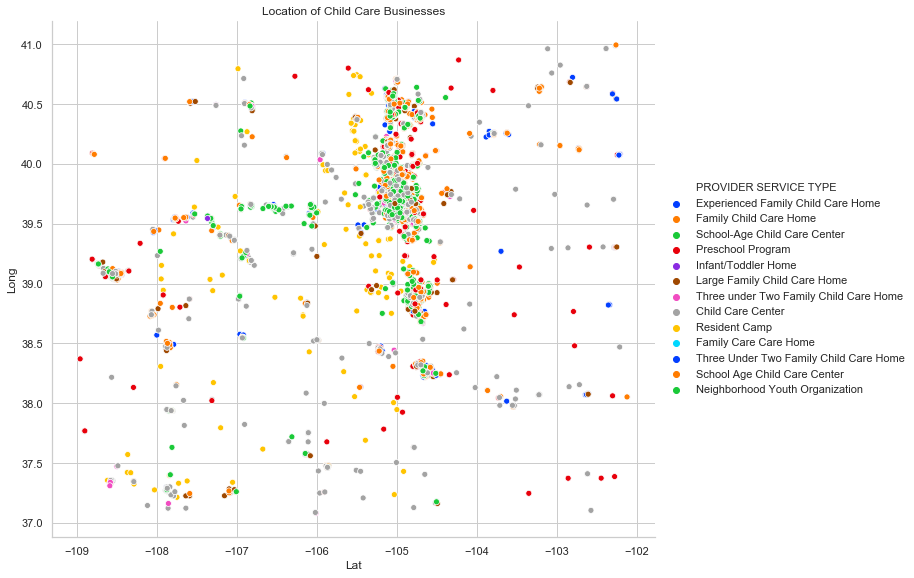

In [33]:
sn.set(style='whitegrid')
sn.hls_palette(10)
sn.relplot(x='Lat', y='Long', hue='PROVIDER SERVICE TYPE', 
           data=locate, height=8, aspect=1.2, palette='bright');
plt.title('Location of Child Care Businesses');

A couple of notes of things we should learn how to do in the future:

1. It would be nice to put these points on a map of Colorado; or to put points for the larger cities in the state.
2. It would also be nice to change it to combine near by points and make a bigger point.

#### What is a good question for this data set?

## Ninth Motivating Example - Flight Delays at DEN

<img src='Images/flights-denver.jpg' width=400>

In [41]:
# Consider the following dataset of the flights originating at DEN in 2008

fd = pa.read_csv('Data Sets/DenverDelayedFlights.csv')

fd = fd.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)

fd.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,4,5,1437.0,1415,1548.0,1530,WN,806,...,9.0,11.0,0,N,0,8.0,0.0,0.0,0.0,10.0
1,2008,1,4,5,1358.0,1345,1652.0,1645,WN,1856,...,5.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,4,5,1614.0,1555,1926.0,1920,WN,1262,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,4,5,1736.0,1700,2234.0,2215,WN,494,...,2.0,7.0,0,N,0,4.0,0.0,0.0,0.0,15.0
4,2008,1,4,5,2041.0,1925,2343.0,2245,WN,2907,...,2.0,10.0,0,N,0,2.0,0.0,0.0,0.0,56.0


In [42]:
fd.shape

(74323, 29)

In [43]:
print('Cancelled flights: {}, Non Cancelled Flights: {} \n'.format(sum(fd.Cancelled == 1), 
                                                                sum(fd.Cancelled == 0)) )
print('{0:.6f}'.format( 100*sum(fd.Cancelled == 1) / fd.shape[0] ))

Cancelled flights: 35, Non Cancelled Flights: 74288 

0.047092


This is going to be a difficult classification question. Less than 0.05% of flights were cancelled.

In [44]:
fd[ fd.Cancelled == 1]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
58441,2008,10,10,5,1502.0,1450,NaN,1546,YV,7097,...,NaN,14.0,1,B,0,NaN,NaN,NaN,NaN,NaN
58760,2008,10,5,7,1852.0,1738,NaN,1904,OO,6224,...,NaN,39.0,1,A,0,NaN,NaN,NaN,NaN,NaN
62298,2008,11,5,3,1032.0,1026,NaN,1125,YV,7151,...,NaN,19.0,1,B,0,NaN,NaN,NaN,NaN,NaN
62375,2008,11,29,6,1319.0,1257,NaN,1356,YV,7098,...,NaN,14.0,1,B,0,NaN,NaN,NaN,NaN,NaN
62376,2008,11,29,6,1030.0,1021,NaN,1120,YV,7151,...,NaN,24.0,1,B,0,NaN,NaN,NaN,NaN,NaN
62386,2008,11,30,7,1255.0,1123,NaN,1224,YV,7193,...,NaN,33.0,1,B,0,NaN,NaN,NaN,NaN,NaN
66243,2008,12,20,6,2125.0,1955,NaN,2205,WN,76,...,NaN,15.0,1,B,0,NaN,NaN,NaN,NaN,NaN
66994,2008,12,4,4,1147.0,1125,NaN,1226,YV,7193,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
67031,2008,12,8,1,1530.0,1513,NaN,1621,YV,7062,...,NaN,21.0,1,B,0,NaN,NaN,NaN,NaN,NaN
67096,2008,12,15,1,1806.0,1755,NaN,1853,YV,7151,...,NaN,34.0,1,B,0,NaN,NaN,NaN,NaN,NaN


#### What are some good questions for this data set?

## Tenth Motivating Example - Image Classification

We are actually planning on skipping this topic in this class, but it is important enough that it deserves a mention. Many of the techniques for classification we are using will work on it.

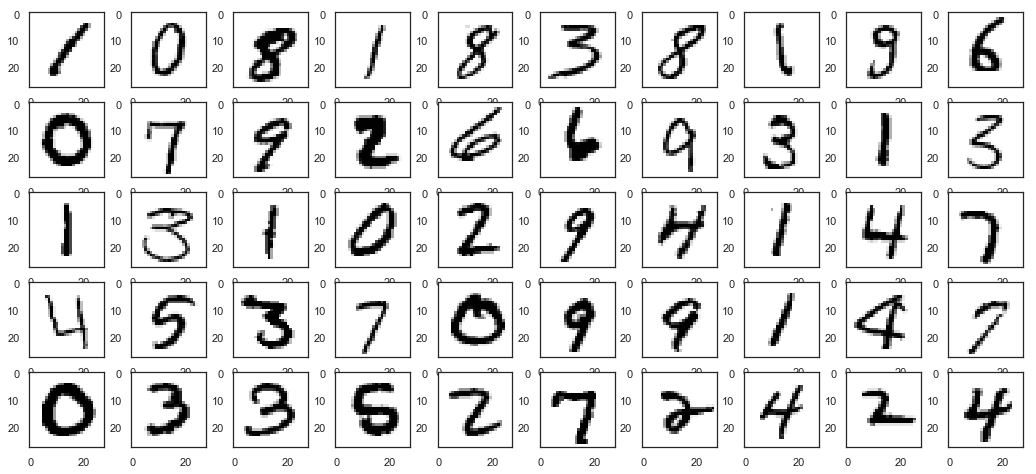

In [78]:
digits = pa.read_csv('Data Sets/digits/train.csv')

sn.set(style = 'white')
fig, ax = plt.subplots(5, 10, figsize = (18, 8))

for i in range(50):
    ax[i%5][i//5].imshow( np.array(digits.iloc[i, 1:]).reshape(28, 28), cmap = 'binary' )

The task is to develop an algorithm for deciding which digit a handwritten digit is.

## Left for a future class - Unsupervised Learning

All of these examples, except possibly the child care one, are what we would call *supervised learning*. We will be discussing *unsupervised learning*, but I am leaving it for a future class to go over. Your team projects in particular should be either a categorization or regression problem in supervised learning.

# Homework 1 - Due 9-5-2019

The first homework assignment is relatively simple. You should go to kaggle.com, data.gov, the University of California at Irvine data archive or one of the other sources we have discussed and identify a dataset that looks interesting to you. 

Be ready to disucss what the dataset is about and what the question might be. Aim at something that is a categorical or regression question (rather than a clustering question). 

# Homework 2 - Due 9-10-2019

The second homework assignment is:

- Save the dataset as a local file .csv file on your machine. Note if you are using the UCI archive this requires changing the name of the file.
- Then make a Python notebook and import the dataset as a pandas.DataFrame (follow the examples we have been doing in class).
- Add some descriptions of what the features are, what the problem is, where the dataset is from.
- Use the examples we did in class, and the help pages on Seaborn to make some preliminary graphs to explore the data with.

# Week 2 - Data and Teams

## What is Data

From [wikitionary](https://en.wiktionary.org/wiki/data)

> Data (noun):
> 1. Information, especially in a scientific or computational context, or with the implication that it is organized. 
> 2. Recorded observations that are usually presented in a structured format.
> 3. A representation of facts or ideas in a formalized manner capable of being communicated or manipulated by some process.
> 4. Digital information such as images or web pages transmitted using the cellular telephone network rather than wifi.

For our class, as time is limited, we are focused on data that can be used for three types of questions:

1. Supervised Learning - Classification
2. Supervised Learning - Regression
3. Unsupervised Learning - Clustering

## Supervised versus Unsupervised Learning

Supervised Learning is statistical learning where we have a training set of data made up of a sample, features of that sample, and then a known answer for the sample to the question.

### Example Classification

Question: Given the characteristics/features of an adult in the US (i.e. their age and education) can we determine whether their income is more or less than $50,000?

The Data: A sample of adults with values for their features and with their known income levels.





In [1]:
import numpy as np                   # Numerical computation library
import pandas as pa                  # Dataframe and Data manipulation Library
import matplotlib.pyplot as plt      # Basic plotting functionality Library
import seaborn as sn                 # Advanced Data visualization Library

In [2]:
ad = pa.read_csv('Data Sets/Adult/adult-data.csv', 
                names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital_status',
                        'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_wk',
                        'country_of_origin', 'income'])

# The folder with the data set also contains a description of the features and a test set.

ad.head()

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_wk,country_of_origin,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


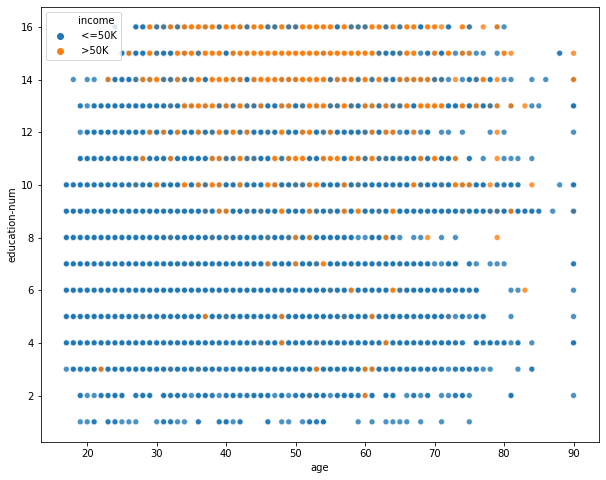

In [17]:
f, ax = plt.subplots(1,1, figsize=(10, 8))

sn.scatterplot(x='age', y='education-num', hue='income',
               data=ad, alpha=0.8, ax=ax);

### Example Regression

Question: Given the characteristics/features of a house in Iowa (i.e. its roof type, and the number of bedrooms) can we determine how much the house will sell for?

The Data: A sample of homes in Iowa with values for their features and with their known sale prices. 

### Example Clustering

Question: Given a set of workouts by your professor, can you determine how they should be grouped together?

The Data: A sample of workouts by your professor with values for their features.

The big difference to me anyway, is that when clustering we are not yet sure what question we are asking.



### Another Example Clustering

Question: Determine the relationships for Airbnbs available in Berlin.

The Data: A collection of features for Airbnbs in Berlin.

Again note that here it is not clear what we might be asking.

## Where to get Data

To make sure you understand why you might care about this part: Your major activity for this class is going to be a team project analyzing a particular data set. Your team will need to develop a proposal for the problem you will do, and in particular the data set you will work from.

So. Let us take some time to examine where we can find data.

Note the answer to this question ''Where to get Data'' depends on the context of what we are really asking, so I will answer it multiple times.

### Where to get Data v1 - To Increase Shareholder/Stakeholder Value

Our goal is to train you to one day soon work for a company (or government agency) doing data science and analysis. Your goal in that role is to increase the value of your company. 

#### Identifying the Question

So to increase value using your data science expertise the first thing you need to do is identify a question - you want to find a classification or regreesion problem that if you could answer it would allow your company to do more with less.

##### An example from UNC

The University of Northern Colorado provides support to students in some early mathematics classes based upon their score on the ALEKS placement. So the question is, for a course like *Mathematics for Liberal Arts* that does not have support yet, can we determine from student characteristics whether a student is likely to need support or not.

I.e. will they complete the course with ABC or a DFW. 

##### An example from Garmin

If Garmin could determine from the activities someone is doing that they are likely training for the New York City Marathon, they could begin sending them specific advertisements for products or benifits/rewards for being a Garmin customer: for example they could offer to load the course map on their device.

##### An example from the city of Greeley

If Greeley can determine an algorithm to estimate the value of homes based upon characteristics, one of which includes the density of trees on the street or the distance from a park. The city could then use this analysis to determine where an investment in neighborhood improvements could have the greatest impact.

Or to analyze the negative impact of a change to zoning or ordinances.

##### Clustering

There also will be situations where your company has data, but is not sure what it means or what could be done with it. At this moment that means that data has no value. If you can use an unsupervised learning method to find structure in the data, it could lead to being able to make better decisions - this means not only does the company do better, but you also have turned that data without value into something that now has value.

For example a company might have a set of data about customers. By using clustering they might find that there are distinct groups of customers in the features, and this could lead to targeted advertising for the distinct groups.

#### Okay so we have not answered the question

Where does a company get data. Well they need to collect it. They collect it with: 

- Gathering existing information from transactions (almost free),
- Gathering additional information during a transaction (almost free),
- Surveys (not free),
- Observations and Experiments, Prototypes (expensive).

Preview - ethics. There are ethical restrictions on what kinds of data we can collect and what we do with it. In many cases there are also legal restrictions. For example if we are collecting information that can be used to identify people, we have a duty to protect their privacy. 

Some industries: (Education, Healthcare, and Banking for example) have many restrictions of what kinds of data can be collected and how it can be used. 

We will take a class to talk in some detail about the ethics of Data Science. 

### Where to get Data v2 - To Contribute to the Public Good

The other reason you might want to find some data to analyze is to contribute to the public good. I follow a number of data scientists and educators on twitter, and often you will see them sharing analysis they have done about healthcare, education, and economics in the US or the world. 

They might have personal benifit from taking the time to work on these problems, in some cases they may be employed by a non-profit or even for-profit company that pays them to work on them, but in many cases I suspect they are doing it as part of a contribution to the public discourse on these topics -- i.e. trying to help us all understand the issue better.

As to where to get this data. Government agencies, and other clearinghouse type places make Terra Bytes worth of data available. Often merely for the price of acknowleding the source of the data when you use it.

#### Some examples

Examples of (mostly) easy to download collections:
- [Colorado Data](https://data.colorado.gov/)
- [USA Data](https://www.data.gov/)
- [United Nations Data](http://data.un.org/)

I like these collections because much of what is here has not been completely explored. The downside is that it is not always clear what the question is.

It requires some digging, but some organizations, like the Pew Charitable Trust publish summaries of data analysis, and link to the data they used. This gives you a way to track down publicly available data, and also gives you some idea of how it could be used.
- [Pew Charitable Trust](https://www.pewtrusts.org/en)

The issue here is that organizations like Pew, by the time they have published aobut a data set, have probably looked into it pretty deeply. 

However, one of the ethical considerations we will discuss is reproducibility. The conclusions and analysis published from a data set should be reproducible if others start from the same set. It takes people spending time with already analyzed data to check for reproducibility.

### Where to get Data v3 - To do Data Science on

One context for *Where to get Data?* is that your professor is telling you to find a data set to work with; or maybe you are developing Data Science as a hobby; or finally maybe you want to test a technique on a challenging or interesting data question.

Two places that are definitely worth some time are:

1. [The University of California at Irvine Data Science Archives](https://archive.ics.uci.edu/ml/datasets.php)

There is a lot available here, and much of it is very interesting. It is also well classified and documented. 

The downside is that it is all thoroughly analyzed. However, working with data that others have already analyzed, one thing you can do is bench mark yourself against others.

2. Which brings me to [Kaggle](https://kaggle.com)

There are two features in Kaggle you should look at. One is the *Datasets* page. This is a list of datasets for people to work with. Many of these are open ended, i.e. it is not clear what the question would be.

Then there is the *competitions* page. Kaggle runs data science competitions, in some cases with prize money. What I like about the competitions is that the datasets provided are **very** real - they will have missing data, in some cases they will be hard to obtain or use, and they will often be **BIG**. They are also organized following the principle we will explore in the Data Science process of having already been divided into a training set and a testing set. Kaggle uses the testing set to score the submissions to the competition.

The Kaggle competitions are also nice because they demonstrate the kind of Data Science works that companies find valuable enough to put some money behind.

Having worked on a couple of these, I can say that it is amazing how easy it is to get into the middle of the leaderboard, and how incredibly hard it is to get anywhere near the top.

I actually toyed with the idea of insisting your project come from a Kaggle competition and that part of the assignment would be to submit your solution to the competition.

The big advantage to getting your datasets from UCI or Kaggle is that the questions to ask are much clearer. In the case of UCI this is because the set has already been thoroughly analyzed, and in the case of Kaggle it is because a company is interested in the answer.